# Week10 - Lab

* Use PCA to reduce dimentionality and use a linear regression to predict
* Use t-SNE to visualize

In [1]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer['data']
y = cancer['target']
print(cancer.target_names)

['malignant' 'benign']


In [2]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

Training examples: 455
Test examples: 114


In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error,r2_score

Cancer_detection_pipeline = Pipeline([('scaling', StandardScaler()), 
              ('pca', PCA(n_components=5)),
              ('model', LinearRegression())
             ])

cancer_detection = Cancer_detection_pipeline.fit(X_train, y_train)

print(cancer_detection)


y_test_pred = cancer_detection.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)

r2_score_val=r2_score(y_test,y_test_pred)

print("Mean square error",mse)

print("r2_score ",r2_score_val)

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=5)),
                ('model', LinearRegression())])
Mean square error 0.07357175407566033
r2_score  0.696367571937986


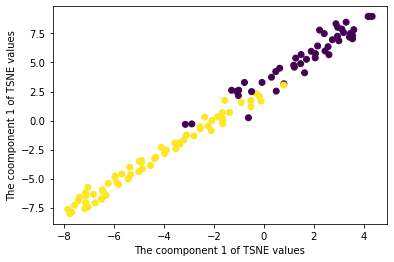

In [9]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=120)

X_test_TSNE = tsne.fit_transform(X_test)

plt.scatter(X_test_TSNE[:, 0], X_test_TSNE[:, 1], c=y_test)
plt.xlabel('The coomponent 1 of TSNE values')
plt.ylabel('The coomponent 1 of TSNE values')
plt.show()